## HPC Lab-6
Name: Tanvi Penumudy

Enroll No: E18CSE187

In [129]:
import multiprocessing 
import os 
import time
import numpy as np

In [130]:
times = []

I. Serial Implementation


In [131]:
import random
X = [random.choices(range(9,999), k=4) for _ in range(4)]
Y = [random.choices(range(9,999), k=4) for _ in range(4)]
result = [[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]

In [132]:
print(X)
print(Y)
print(result)

[[723, 475, 100, 243], [956, 973, 710, 228], [863, 274, 647, 72], [324, 48, 134, 772]]
[[778, 984, 260, 252], [920, 971, 357, 341], [86, 409, 826, 491], [794, 200, 82, 743]]
[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]


In [133]:
%%time
t = time.time()
for i in range(len(X)):
   for j in range(len(Y[0])):
       for k in range(len(Y)):
           result[i][j] += X[i][k] * Y[k][j]
print(result)
times.append(time.time()-t)

[[1201036, 1262157, 460081, 573820], [1881020, 2221477, 1201077, 1090719], [1036304, 1394269, 862524, 682083], [920724, 574630, 275364, 737406]]
CPU times: user 176 µs, sys: 36 µs, total: 212 µs
Wall time: 187 µs


In [134]:
# Changing N Value
U = [random.choices(range(9,999), k=8) for _ in range(8)]
V = [random.choices(range(9,999), k=8) for _ in range(8)]
def zeros(rows,cols):
  return [([0]*cols) for i in range(rows)]
r = zeros(8,8)

In [135]:
%%time
t = time.time()
for i in range(len(U)):
   for j in range(len(V[0])):
       for k in range(len(V)):
           r[i][j] += U[i][k] * V[k][j]
print(r)
times.append(time.time()-t)

[[2401733, 2207969, 2296602, 1717697, 2304055, 3047990, 2081661, 1935323], [3461379, 2604943, 3275752, 2678372, 3082528, 3357524, 3477536, 3540656], [2139478, 1822904, 2294308, 2229388, 1597399, 2294766, 2386466, 2238051], [1786516, 1658190, 1397551, 1698515, 1532311, 1899233, 1644557, 1765860], [1730631, 1361908, 1600301, 1269235, 1741798, 1613630, 1659953, 2051329], [2396269, 1831441, 2346893, 1549054, 2072458, 2590035, 2122642, 2469041], [2327082, 2056760, 2409302, 2000677, 2399213, 2535672, 2421974, 2351932], [1559805, 1617301, 1843645, 1781488, 1746726, 1889635, 1907159, 1453410]]
CPU times: user 415 µs, sys: 85 µs, total: 500 µs
Wall time: 422 µs


In [136]:
# Changing Data Type
K = np.random.uniform(9,999,[4,4])
L = np.random.uniform(9,999,[4,4])
res = np.zeros((4,4))
K = K.tolist()
L = L.tolist()

In [137]:
%%time
t = time.time()
for i in range(len(K)):
   for j in range(len(L[0])):
       for k in range(len(L)):
           res[i][j] += K[i][k] * L[k][j]
print(res)
times.append(time.time()-t)

[[1032749.97205546 1380395.87438983 1930739.46563826 1680765.63309024]
 [ 836436.61548045 1269809.13463534 1374928.95498086 1472663.93207178]
 [ 663251.11268091 1092222.86886876 1258683.09494744 1190574.81474242]
 [ 987042.49680892 1366904.97599054 1866329.617021   1654195.4034343 ]]
CPU times: user 1.15 ms, sys: 27 µs, total: 1.18 ms
Wall time: 1.29 ms


II. Data Parallel Implementation 

In [138]:
%%time
t = time.time()
def worker1(X, Y, result): 
  for i in range(len(X)):
   for j in range(len(Y[0])):
       for k in range(len(Y)):
           result[i][j] += X[i][k] * Y[k][j]
  return result

def worker2(X, Y, result):
  for i in range(len(X)):
   for j in range(len(Y[0])):
       for k in range(len(Y)):
           result[i][j] += X[i][k] * Y[k][j]
  return result
  
if __name__ == "__main__": 

  # creating processes 
  p1 = multiprocessing.Process(target=worker1) 
  p2 = multiprocessing.Process(target=worker2)

  # starting processes 
  p1.start() 
  p2.start()

  # wait until processes are finished 
  p1.join() 
  p2.join() 

  # both processes finished 
  print(worker1(X[:2],Y,[[0,0,0,0],[0,0,0,0]]))
  print(worker2(X[2:],Y,[[0,0,0,0],[0,0,0,0]]))
  print("Done!")
times.append(time.time()-t)

Process Process-7:
Traceback (most recent call last):
Process Process-8:
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
TypeError: worker2() missing 3 required positional arguments: 'X', 'Y', and 'result'
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
TypeError: worker1() missing 3 required positional arguments: 'X', 'Y', and 'result'


[[1201036, 1262157, 460081, 573820], [1881020, 2221477, 1201077, 1090719]]
[[1036304, 1394269, 862524, 682083], [920724, 574630, 275364, 737406]]
Done!
CPU times: user 6.25 ms, sys: 26.3 ms, total: 32.6 ms
Wall time: 67 ms


In [139]:
# Changing N Value
%%time
t = time.time()
def worker1(X, Y, result): 
  for i in range(len(X)):
   for j in range(len(Y[0])):
       for k in range(len(Y)):
           result[i][j] += X[i][k] * Y[k][j]
  return result

def worker2(X, Y, result):
  for i in range(len(X)):
   for j in range(len(Y[0])):
       for k in range(len(Y)):
           result[i][j] += X[i][k] * Y[k][j]
  return result
  
if __name__ == "__main__": 

  # creating processes 
  p1 = multiprocessing.Process(target=worker1) 
  p2 = multiprocessing.Process(target=worker2)

  # starting processes 
  p1.start() 
  p2.start()

  # wait until processes are finished 
  p1.join() 
  p2.join() 

  # both processes finished 
  print(worker1(U[:4],V,zeros(4,8)))
  print(worker2(U[4:],V,zeros(4,8)))
  print("Done!")
times.append(time.time()-t)

Process Process-9:
Traceback (most recent call last):
Process Process-10:
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
TypeError: worker1() missing 3 required positional arguments: 'X', 'Y', and 'result'
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
TypeError: worker2() missing 3 required positional arguments: 'X', 'Y', and 'result'


[[2401733, 2207969, 2296602, 1717697, 2304055, 3047990, 2081661, 1935323], [3461379, 2604943, 3275752, 2678372, 3082528, 3357524, 3477536, 3540656], [2139478, 1822904, 2294308, 2229388, 1597399, 2294766, 2386466, 2238051], [1786516, 1658190, 1397551, 1698515, 1532311, 1899233, 1644557, 1765860]]
[[1730631, 1361908, 1600301, 1269235, 1741798, 1613630, 1659953, 2051329], [2396269, 1831441, 2346893, 1549054, 2072458, 2590035, 2122642, 2469041], [2327082, 2056760, 2409302, 2000677, 2399213, 2535672, 2421974, 2351932], [1559805, 1617301, 1843645, 1781488, 1746726, 1889635, 1907159, 1453410]]
Done!
CPU times: user 8.37 ms, sys: 24.5 ms, total: 32.9 ms
Wall time: 70 ms


In [140]:
# Changing Data Type
t = time.time()
def worker1(X, Y, result): 
  for i in range(len(X)):
   for j in range(len(Y[0])):
       for k in range(len(Y)):
           result[i][j] += X[i][k] * Y[k][j]
  return result

def worker2(X, Y, result):
  for i in range(len(X)):
   for j in range(len(Y[0])):
       for k in range(len(Y)):
           result[i][j] += X[i][k] * Y[k][j]
  return result
  
if __name__ == "__main__": 

  # creating processes 
  p1 = multiprocessing.Process(target=worker1) 
  p2 = multiprocessing.Process(target=worker2)

  # starting processes 
  p1.start() 
  p2.start()

  # wait until processes are finished 
  p1.join() 
  p2.join() 

  # both processes finished 
  print(worker1(K[:2],L,np.zeros((2,4))))
  print(worker2(K[2:],L,np.zeros((2,4))))
  print("Done!")
times.append(time.time()-t)

Process Process-11:
Traceback (most recent call last):
Process Process-12:
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
TypeError: worker1() missing 3 required positional arguments: 'X', 'Y', and 'result'
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
TypeError: worker2() missing 3 required positional arguments: 'X', 'Y', and 'result'


[[1032749.97205546 1380395.87438983 1930739.46563826 1680765.63309024]
 [ 836436.61548045 1269809.13463534 1374928.95498086 1472663.93207178]]
[[ 663251.11268091 1092222.86886876 1258683.09494744 1190574.81474242]
 [ 987042.49680892 1366904.97599054 1866329.617021   1654195.4034343 ]]
Done!


III. Numpy

In [141]:
A = np.array(X)
B = np.array(Y)

In [142]:
%%time
t = time.time()
print(np.dot(A,B))
times.append(time.time()-t)

[[1201036 1262157  460081  573820]
 [1881020 2221477 1201077 1090719]
 [1036304 1394269  862524  682083]
 [ 920724  574630  275364  737406]]
CPU times: user 610 µs, sys: 0 ns, total: 610 µs
Wall time: 489 µs


In [143]:
# Changing N Value
C = np.array(U)
D = np.array(V)

In [144]:
%%time
t = time.time()
print(np.dot(C,D))
times.append(time.time()-t)

[[2401733 2207969 2296602 1717697 2304055 3047990 2081661 1935323]
 [3461379 2604943 3275752 2678372 3082528 3357524 3477536 3540656]
 [2139478 1822904 2294308 2229388 1597399 2294766 2386466 2238051]
 [1786516 1658190 1397551 1698515 1532311 1899233 1644557 1765860]
 [1730631 1361908 1600301 1269235 1741798 1613630 1659953 2051329]
 [2396269 1831441 2346893 1549054 2072458 2590035 2122642 2469041]
 [2327082 2056760 2409302 2000677 2399213 2535672 2421974 2351932]
 [1559805 1617301 1843645 1781488 1746726 1889635 1907159 1453410]]
CPU times: user 366 µs, sys: 77 µs, total: 443 µs
Wall time: 373 µs


In [145]:
# Changing Data Type
E = np.array(K)
F = np.array(L)

In [146]:
%%time
t = time.time()
print(np.dot(E,F))
times.append(time.time()-t)

[[1032749.97205546 1380395.87438983 1930739.46563826 1680765.63309024]
 [ 836436.61548045 1269809.13463534 1374928.95498086 1472663.93207178]
 [ 663251.11268091 1092222.86886876 1258683.09494744 1190574.81474242]
 [ 987042.49680892 1366904.97599054 1866329.617021   1654195.4034343 ]]
CPU times: user 819 µs, sys: 0 ns, total: 819 µs
Wall time: 689 µs


IV. Scipy


In [147]:
from scipy import linalg

In [148]:
A = np.array(X)
B = np.array(Y)

In [149]:
%%time
t = time.time()
print(A.dot(B))
times.append(time.time()-t)

[[1201036 1262157  460081  573820]
 [1881020 2221477 1201077 1090719]
 [1036304 1394269  862524  682083]
 [ 920724  574630  275364  737406]]
CPU times: user 642 µs, sys: 134 µs, total: 776 µs
Wall time: 1.82 ms


In [150]:
# Changing N Value
%%time
t = time.time()
print(C.dot(D))
times.append(time.time()-t)

[[2401733 2207969 2296602 1717697 2304055 3047990 2081661 1935323]
 [3461379 2604943 3275752 2678372 3082528 3357524 3477536 3540656]
 [2139478 1822904 2294308 2229388 1597399 2294766 2386466 2238051]
 [1786516 1658190 1397551 1698515 1532311 1899233 1644557 1765860]
 [1730631 1361908 1600301 1269235 1741798 1613630 1659953 2051329]
 [2396269 1831441 2346893 1549054 2072458 2590035 2122642 2469041]
 [2327082 2056760 2409302 2000677 2399213 2535672 2421974 2351932]
 [1559805 1617301 1843645 1781488 1746726 1889635 1907159 1453410]]
CPU times: user 323 µs, sys: 67 µs, total: 390 µs
Wall time: 396 µs


In [151]:
# Changing Data Type
%%time
t = time.time()
print(E.dot(F))
times.append(time.time()-t)

[[1032749.97205546 1380395.87438983 1930739.46563826 1680765.63309024]
 [ 836436.61548045 1269809.13463534 1374928.95498086 1472663.93207178]
 [ 663251.11268091 1092222.86886876 1258683.09494744 1190574.81474242]
 [ 987042.49680892 1366904.97599054 1866329.617021   1654195.4034343 ]]
CPU times: user 0 ns, sys: 537 µs, total: 537 µs
Wall time: 437 µs


V. Pandas

In [152]:
import pandas as pd

In [153]:
A = pd.DataFrame(X)
B = pd.DataFrame(Y)

In [154]:
%%time
t = time.time()
print(A.dot(B))
times.append(time.time()-t)

         0        1        2        3
0  1201036  1262157   460081   573820
1  1881020  2221477  1201077  1090719
2  1036304  1394269   862524   682083
3   920724   574630   275364   737406
CPU times: user 10.1 ms, sys: 0 ns, total: 10.1 ms
Wall time: 11.4 ms


In [155]:
# Changing N Value
C = pd.DataFrame(U)
D = pd.DataFrame(V)

In [156]:
%%time
t = time.time()
print(C.dot(D))
times.append(time.time()-t)

         0        1        2        3        4        5        6        7
0  2401733  2207969  2296602  1717697  2304055  3047990  2081661  1935323
1  3461379  2604943  3275752  2678372  3082528  3357524  3477536  3540656
2  2139478  1822904  2294308  2229388  1597399  2294766  2386466  2238051
3  1786516  1658190  1397551  1698515  1532311  1899233  1644557  1765860
4  1730631  1361908  1600301  1269235  1741798  1613630  1659953  2051329
5  2396269  1831441  2346893  1549054  2072458  2590035  2122642  2469041
6  2327082  2056760  2409302  2000677  2399213  2535672  2421974  2351932
7  1559805  1617301  1843645  1781488  1746726  1889635  1907159  1453410
CPU times: user 8.89 ms, sys: 156 µs, total: 9.05 ms
Wall time: 10.3 ms


In [157]:
# Changing Data Frame
E = pd.DataFrame(K)
F = pd.DataFrame(L)

In [158]:
%%time
t = time.time()
print(E.dot(F))
times.append(time.time()-t)

              0             1             2             3
0  1.032750e+06  1.380396e+06  1.930739e+06  1.680766e+06
1  8.364366e+05  1.269809e+06  1.374929e+06  1.472664e+06
2  6.632511e+05  1.092223e+06  1.258683e+06  1.190575e+06
3  9.870425e+05  1.366905e+06  1.866330e+06  1.654195e+06
CPU times: user 9.79 ms, sys: 0 ns, total: 9.79 ms
Wall time: 12.3 ms


VI. Sympy

In [159]:
from sympy import *

In [160]:
A = Matrix(X)
B = Matrix(Y)

In [161]:
A

Matrix([
[723, 475, 100, 243],
[956, 973, 710, 228],
[863, 274, 647,  72],
[324,  48, 134, 772]])

In [162]:
B

Matrix([
[778, 984, 260, 252],
[920, 971, 357, 341],
[ 86, 409, 826, 491],
[794, 200,  82, 743]])

In [163]:
%%time
t = time.time()
print(A*B)
times.append(time.time()-t)

Matrix([[1201036, 1262157, 460081, 573820], [1881020, 2221477, 1201077, 1090719], [1036304, 1394269, 862524, 682083], [920724, 574630, 275364, 737406]])
CPU times: user 1.93 ms, sys: 0 ns, total: 1.93 ms
Wall time: 3.71 ms


In [164]:
# Changing N Value
C = Matrix(U)
D = Matrix(V)

In [165]:
%%time
t = time.time()
print(C*D)
times.append(time.time()-t)

Matrix([[2401733, 2207969, 2296602, 1717697, 2304055, 3047990, 2081661, 1935323], [3461379, 2604943, 3275752, 2678372, 3082528, 3357524, 3477536, 3540656], [2139478, 1822904, 2294308, 2229388, 1597399, 2294766, 2386466, 2238051], [1786516, 1658190, 1397551, 1698515, 1532311, 1899233, 1644557, 1765860], [1730631, 1361908, 1600301, 1269235, 1741798, 1613630, 1659953, 2051329], [2396269, 1831441, 2346893, 1549054, 2072458, 2590035, 2122642, 2469041], [2327082, 2056760, 2409302, 2000677, 2399213, 2535672, 2421974, 2351932], [1559805, 1617301, 1843645, 1781488, 1746726, 1889635, 1907159, 1453410]])
CPU times: user 4.18 ms, sys: 0 ns, total: 4.18 ms
Wall time: 4.12 ms


In [166]:
# Changing Data Type
E = Matrix(K)
F = Matrix(L)

In [167]:
%%time
t = time.time()
print(E*F)
times.append(time.time()-t)

Matrix([[1032749.97205546, 1380395.87438983, 1930739.46563826, 1680765.63309024], [836436.615480447, 1269809.13463534, 1374928.95498086, 1472663.93207178], [663251.112680908, 1092222.86886876, 1258683.09494744, 1190574.81474242], [987042.496808918, 1366904.97599054, 1866329.61702100, 1654195.40343430]])
CPU times: user 2.95 ms, sys: 7 µs, total: 2.96 ms
Wall time: 2.86 ms


VII. Numba

In [168]:
import numba
from numba import jit

In [169]:
@jit('void(int64[:,:],int64[:,:],int64[:,:])')
def numba_mul(matrix1,matrix2,rmatrix):
  for i in range(len(matrix1)):
    for j in range(len(matrix2[0])):
      for k in range(len(matrix2)):
        rmatrix[i][j] += matrix1[i][k] * matrix2[k][j]

In [170]:
matrix1 = np.array(X)
matrix2 = np.array(Y)
rmatrix = np.array([[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]])

In [171]:
%%time
t = time.time()
numba_mul(matrix1,matrix2,rmatrix)
for r in rmatrix:
  print(r)
times.append(time.time()-t)

[1201036 1262157  460081  573820]
[1881020 2221477 1201077 1090719]
[1036304 1394269  862524  682083]
[920724 574630 275364 737406]
CPU times: user 179 µs, sys: 846 µs, total: 1.02 ms
Wall time: 848 µs


In [172]:
# Changing N Value
matrix1 = np.array(U)
matrix2 = np.array(V)
rmatrix = np.array([[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0]])

In [173]:
%%time
t = time.time()
numba_mul(matrix1,matrix2,rmatrix)
for r in rmatrix:
  print(r)
times.append(time.time()-t)

[2401733 2207969 2296602 1717697 2304055 3047990 2081661 1935323]
[3461379 2604943 3275752 2678372 3082528 3357524 3477536 3540656]
[2139478 1822904 2294308 2229388 1597399 2294766 2386466 2238051]
[1786516 1658190 1397551 1698515 1532311 1899233 1644557 1765860]
[1730631 1361908 1600301 1269235 1741798 1613630 1659953 2051329]
[2396269 1831441 2346893 1549054 2072458 2590035 2122642 2469041]
[2327082 2056760 2409302 2000677 2399213 2535672 2421974 2351932]
[1559805 1617301 1843645 1781488 1746726 1889635 1907159 1453410]
CPU times: user 2.92 ms, sys: 176 µs, total: 3.09 ms
Wall time: 4.71 ms


In [174]:
# Changing Data Type
@jit('void(float64[:,:],float64[:,:],float64[:,:])')
def numba_mul(matrix1,matrix2,rmatrix):
  for i in range(len(matrix1)):
    for j in range(len(matrix2[0])):
      for k in range(len(matrix2)):
        rmatrix[i][j] += matrix1[i][k] * matrix2[k][j]

matrix1 = np.array(K)
matrix2 = np.array(L)
rmatrix = np.zeros((4,4))

In [175]:
%%time
t = time.time()
numba_mul(matrix1,matrix2,rmatrix)
for r in rmatrix:
  print(r)
times.append(time.time()-t)

[1032749.97205546 1380395.87438983 1930739.46563826 1680765.63309024]
[ 836436.61548045 1269809.13463534 1374928.95498086 1472663.93207178]
[ 663251.11268091 1092222.86886876 1258683.09494744 1190574.81474242]
[ 987042.49680892 1366904.97599054 1866329.617021   1654195.4034343 ]
CPU times: user 0 ns, sys: 1.78 ms, total: 1.78 ms
Wall time: 1.65 ms


VIII. Linalg

In [176]:
!pip install linalg

In [177]:
import linalg

In [178]:
A = linalg.Matrix(X) 
B = linalg.Matrix(Y) 

In [179]:
%%time
t = time.time()
print(A@B)
times.append(time.time()-t)

|12010 12621 46008 57382 |
|18810 22214 12010 10907 |
|10363 13942 86252 68208 |
|92072 57463 27536 73740 |

CPU times: user 939 µs, sys: 0 ns, total: 939 µs
Wall time: 1.06 ms


In [180]:
# Changing N Value
C = linalg.Matrix(U) 
D = linalg.Matrix(V) 

In [181]:
%%time
t = time.time()
print(C@D)
times.append(time.time()-t)

|24017 22079 22966 17176 23040 30479 20816 19353 |
|34613 26049 32757 26783 30825 33575 34775 35406 |
|21394 18229 22943 22293 15973 22947 23864 22380 |
|17865 16581 13975 16985 15323 18992 16445 17658 |
|17306 13619 16003 12692 17417 16136 16599 20513 |
|23962 18314 23468 15490 20724 25900 21226 24690 |
|23270 20567 24093 20006 23992 25356 24219 23519 |
|15598 16173 18436 17814 17467 18896 19071 14534 |

CPU times: user 0 ns, sys: 684 µs, total: 684 µs
Wall time: 721 µs


In [182]:
# Changing Data Type
E = linalg.Matrix(K) 
F = linalg.Matrix(L) 

In [183]:
%%time
t = time.time()
print(E@F)
times.append(time.time()-t)

|10327 13803 19307 16807 |
|83643 12698 13749 14726 |
|66325 10922 12586 11905 |
|98704 13669 18663 16541 |

CPU times: user 196 µs, sys: 0 ns, total: 196 µs
Wall time: 202 µs


IX. Pymatrix

In [184]:
!pip install pymatrix

In [185]:
from pymatrix import matrix

In [186]:
A = matrix(X)
B = matrix(Y)

In [187]:
%%time
t = time.time()
print(A*B)
times.append(time.time()-t)

1201036 1262157  460081  573820
1881020 2221477 1201077 1090719
1036304 1394269  862524  682083
 920724  574630  275364  737406
CPU times: user 596 µs, sys: 0 ns, total: 596 µs
Wall time: 602 µs


In [188]:
# Changing N Value
C = matrix(U)
D = matrix(V)

In [189]:
%%time
t = time.time()
print(C*D)
times.append(time.time()-t)

2401733 2207969 2296602 1717697 2304055 3047990 2081661 1935323
3461379 2604943 3275752 2678372 3082528 3357524 3477536 3540656
2139478 1822904 2294308 2229388 1597399 2294766 2386466 2238051
1786516 1658190 1397551 1698515 1532311 1899233 1644557 1765860
1730631 1361908 1600301 1269235 1741798 1613630 1659953 2051329
2396269 1831441 2346893 1549054 2072458 2590035 2122642 2469041
2327082 2056760 2409302 2000677 2399213 2535672 2421974 2351932
1559805 1617301 1843645 1781488 1746726 1889635 1907159 1453410
CPU times: user 1.34 ms, sys: 0 ns, total: 1.34 ms
Wall time: 1.69 ms


In [190]:
# Changing Data Type
E = matrix(K)
F = matrix(L)

In [191]:
%%time
t = time.time()
print(E*F)
times.append(time.time()-t)

1032749.9720554573 1380395.8743898252  1930739.465638258 1680765.6330902418
  836436.615480447 1269809.1346353446 1374928.9549808628 1472663.9320717803
 663251.1126809083 1092222.8688687591 1258683.0949474387  1190574.814742419
 987042.4968089182 1366904.9759905399  1866329.617021001 1654195.4034342978
CPU times: user 1.04 ms, sys: 0 ns, total: 1.04 ms
Wall time: 1.07 ms


X. TensorFlow

In [192]:
import tensorflow as tf

In [193]:
%%time
t = time.time()
print(tf.matmul(X, Y))
times.append(time.time()-t)

tf.Tensor(
[[1201036 1262157  460081  573820]
 [1881020 2221477 1201077 1090719]
 [1036304 1394269  862524  682083]
 [ 920724  574630  275364  737406]], shape=(4, 4), dtype=int32)
CPU times: user 823 µs, sys: 1.99 ms, total: 2.82 ms
Wall time: 2.72 ms


In [194]:
# Changing N Value
%%time
t = time.time()
print(tf.matmul(U, V))
times.append(time.time()-t)

tf.Tensor(
[[2401733 2207969 2296602 1717697 2304055 3047990 2081661 1935323]
 [3461379 2604943 3275752 2678372 3082528 3357524 3477536 3540656]
 [2139478 1822904 2294308 2229388 1597399 2294766 2386466 2238051]
 [1786516 1658190 1397551 1698515 1532311 1899233 1644557 1765860]
 [1730631 1361908 1600301 1269235 1741798 1613630 1659953 2051329]
 [2396269 1831441 2346893 1549054 2072458 2590035 2122642 2469041]
 [2327082 2056760 2409302 2000677 2399213 2535672 2421974 2351932]
 [1559805 1617301 1843645 1781488 1746726 1889635 1907159 1453410]], shape=(8, 8), dtype=int32)
CPU times: user 950 µs, sys: 0 ns, total: 950 µs
Wall time: 801 µs


In [195]:
# Changing Data Type
%%time
t = time.time()
print(tf.matmul(K, L))
times.append(time.time()-t)

tf.Tensor(
[[1032749.94 1380395.9  1930739.5  1680765.6 ]
 [ 836436.56 1269809.1  1374929.   1472664.  ]
 [ 663251.1  1092222.9  1258683.1  1190574.8 ]
 [ 987042.44 1366905.   1866329.5  1654195.5 ]], shape=(4, 4), dtype=float32)
CPU times: user 2.49 ms, sys: 902 µs, total: 3.39 ms
Wall time: 4.38 ms


XI. PyCuda

In [196]:
!pip install cuda

In [197]:
!pip install pycuda

In [198]:
import pycuda.autoinit
from pycuda import driver, compiler, gpuarray, tools

In [199]:
kernel_code_template = """
__global__ void MatrixMulKernel(float *a, float *b, float *c)
{
    int tx = threadIdx.x;
    int ty = threadIdx.y;

    // Pvalue is used to store the element of the matrix
    // that is computed by the thread
    float Pvalue = 0;

    // Each thread loads one row of M and one column of N, 
    //   to produce one element of P.
    for (int k = 0; k < %(MATRIX_SIZE)s; ++k) {
        float Aelement = a[ty * %(MATRIX_SIZE)s + k];
        float Belement = b[k * %(MATRIX_SIZE)s + tx];
        Pvalue += Aelement * Belement;
    }

    // Write the matrix to device memory;
    // each thread writes one element
    c[ty * %(MATRIX_SIZE)s + tx] = Pvalue;
}
"""

In [200]:
MATRIX_SIZE = 4

a_gpu = gpuarray.to_gpu(np.random.randn(MATRIX_SIZE, MATRIX_SIZE).astype(np.int64)) 
b_gpu = gpuarray.to_gpu(np.random.randn(MATRIX_SIZE, MATRIX_SIZE).astype(np.int64))
c_gpu = gpuarray.empty((MATRIX_SIZE, MATRIX_SIZE), np.int64)

kernel_code = kernel_code_template % {
    'MATRIX_SIZE': MATRIX_SIZE 
    }

mod = compiler.SourceModule(kernel_code)
matrixmul = mod.get_function("MatrixMulKernel")

In [201]:
%%time
t = time.time()
matrixmul(
    a_gpu, b_gpu, 
    c_gpu,
    block = (MATRIX_SIZE, MATRIX_SIZE, 1),
    )
times.append(time.time()-t)

CPU times: user 92 µs, sys: 19 µs, total: 111 µs
Wall time: 114 µs


In [202]:
# Changing N Value
MATRIX_SIZE = 8

a_gpu = gpuarray.to_gpu(np.random.randn(MATRIX_SIZE, MATRIX_SIZE).astype(np.int64)) 
b_gpu = gpuarray.to_gpu(np.random.randn(MATRIX_SIZE, MATRIX_SIZE).astype(np.int64))
c_gpu = gpuarray.empty((MATRIX_SIZE, MATRIX_SIZE), np.int64)

kernel_code = kernel_code_template % {
    'MATRIX_SIZE': MATRIX_SIZE 
    }

mod = compiler.SourceModule(kernel_code)
matrixmul = mod.get_function("MatrixMulKernel")

In [203]:
%%time
t = time.time()
matrixmul(
    a_gpu, b_gpu, 
    c_gpu,
    block = (MATRIX_SIZE, MATRIX_SIZE, 1),
    )
times.append(time.time()-t)

CPU times: user 69 µs, sys: 14 µs, total: 83 µs
Wall time: 86.8 µs


In [204]:
# Changing Data Type
MATRIX_SIZE = 4

a_gpu = gpuarray.to_gpu(np.random.randn(MATRIX_SIZE, MATRIX_SIZE).astype(np.float64)) 
b_gpu = gpuarray.to_gpu(np.random.randn(MATRIX_SIZE, MATRIX_SIZE).astype(np.float64))
c_gpu = gpuarray.empty((MATRIX_SIZE, MATRIX_SIZE), np.float64)

kernel_code = kernel_code_template % {
    'MATRIX_SIZE': MATRIX_SIZE 
    }

mod = compiler.SourceModule(kernel_code)
matrixmul = mod.get_function("MatrixMulKernel")

In [205]:
%%time
t = time.time()
matrixmul(
    a_gpu, b_gpu, 
    c_gpu,
    block = (MATRIX_SIZE, MATRIX_SIZE, 1),
    )
times.append(time.time()-t)

CPU times: user 96 µs, sys: 20 µs, total: 116 µs
Wall time: 119 µs


In [206]:
len(times)

33

In [207]:
print(*times)

0.00017571449279785156 0.0004076957702636719 0.0012767314910888672 0.06696057319641113 0.07000732421875 0.06522607803344727 0.0004734992980957031 0.00036072731018066406 0.0006732940673828125 0.0018050670623779297 0.0003826618194580078 0.00042510032653808594 0.011348247528076172 0.010255575180053711 0.012278318405151367 0.0036933422088623047 0.0041027069091796875 0.002844095230102539 0.0008327960968017578 0.004693746566772461 0.0016314983367919922 0.0010433197021484375 0.0007078647613525391 0.0001914501190185547 0.0005886554718017578 0.0016736984252929688 0.001054525375366211 0.0026993751525878906 0.0007891654968261719 0.004359006881713867 0.00010752677917480469 7.939338684082031e-05 0.00011157989501953125


In [208]:
from matplotlib import pyplot as plt

(0.0, 33.0)

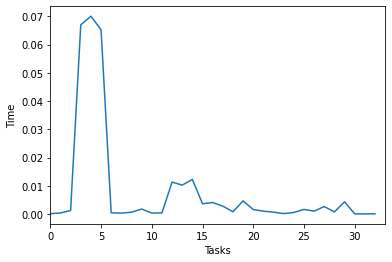

In [211]:
plt.plot([i for i in range(0,33)],times)
plt.xlabel("Tasks")
plt.ylabel("Time")
plt.xlim(0, 33)